## Principal Component Analysis (PCA): 

This method statistically analyzes the source
images and creates a new image with the most prominent features.

In [1]:
import numpy as np
import cv2

def image_fusion_pca(img1, img2, num_components):
    # Read input images
    I1 = cv2.imread(img1)
    I2 = cv2.imread(img2)
    
    # Ensure both images have the same dimensions
    I2 = cv2.resize(I2, (I1.shape[1], I1.shape[0]))

    # Stack pixel values of both images into a single data matrix
    data_matrix = np.vstack((I1.reshape(-1, 3), I2.reshape(-1, 3)))

    # Perform PCA
    mean = np.mean(data_matrix, axis=0)
    centered_data = data_matrix - mean
    covariance_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    principal_components = sorted_eigenvectors[:, :num_components]

    # Transform images to PCA feature space
    transformed_img1 = np.dot(I1.reshape(-1, 3) - mean, principal_components)
    transformed_img2 = np.dot(I2.reshape(-1, 3) - mean, principal_components)

    # Fusion rule (e.g., average)
    fused_features = (transformed_img1 + transformed_img2) / 2

    # Transform fused features back to pixel space
    fused_pixels = np.dot(fused_features, principal_components.T) + mean
    fused_image = fused_pixels.reshape(I1.shape)

    return fused_image.astype(np.uint8)


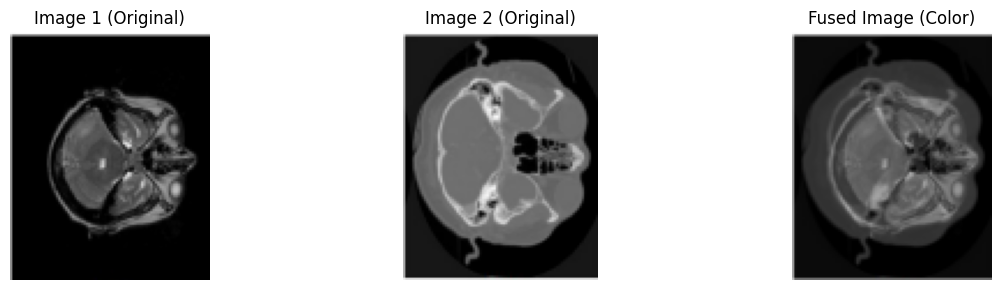

In [3]:
import cv2
import matplotlib.pyplot as plt

# Function to display images in a row
def plot_images_color(img1, img2, fused_img):
    plt.figure(figsize=(13,3))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title('Image 1 (Original)')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title('Image 2 (Original)')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(fused_img, cv2.COLOR_BGR2RGB))
    plt.title('Fused Image (Color)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get paths for two images from user
img1_path = "D:/SDP/Imfusion-main/screenshots/medical1.png"
img2_path = "D:/SDP/Imfusion-main/screenshots/medical2.png"

# Read input images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Perform fusion
fused_img = image_fusion_pca(img1_path, img2_path, num_components=3)

# Display original color images and fused image in color
plot_images_color(img1, img2, fused_img)


## IHS (Intensity-Hue-Saturation) Transform: 

This technique separates the source images
into intensity, hue, and saturation components, enabling fusion in these separate domains

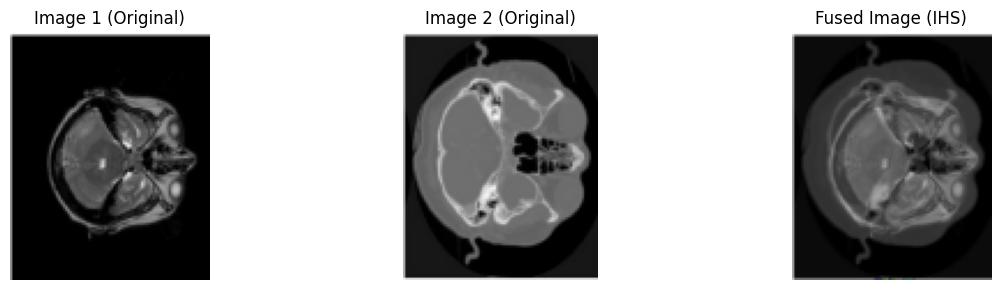

In [29]:
import cv2
import matplotlib.pyplot as plt

# Function to display images in a row
def plot_images_color(img1, img2, fused_img):
    plt.figure(figsize=(13,3))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title('Image 1 (Original)')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title('Image 2 (Original)')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(fused_img, cv2.COLOR_BGR2RGB))
    plt.title('Fused Image (IHS)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def image_fusion_ihs(img1, img2):
    # Read input images
    I1 = cv2.imread(img1)
    I2 = cv2.imread(img2)
    
    # Ensure both images have the same dimensions
    I2 = cv2.resize(I2, (I1.shape[1], I1.shape[0]))

    # Convert images to the IHS color space
    I1_ihs = cv2.cvtColor(I1, cv2.COLOR_BGR2HSV)
    I2_ihs = cv2.cvtColor(I2, cv2.COLOR_BGR2HSV)

    # Fusion in each domain (e.g., simple averaging)
    fused_i = (I1_ihs[:,:,2].astype(float) + I2_ihs[:,:,2].astype(float)) / 2
    fused_h = (I1_ihs[:,:,0].astype(float) + I2_ihs[:,:,0].astype(float)) / 2
    fused_s = (I1_ihs[:,:,1].astype(float) + I2_ihs[:,:,1].astype(float)) / 2

    # Combine the fused components
    fused_ihs = cv2.merge((fused_h.astype(np.uint8), fused_s.astype(np.uint8), fused_i.astype(np.uint8)))

    # Convert the fused image back to the RGB color space
    fused_image = cv2.cvtColor(fused_ihs, cv2.COLOR_HSV2BGR)

    return fused_image


# Get paths for two images from user
img1_path = "D:/SDP/Imfusion-main/screenshots/medical1.png"
img2_path = "D:/SDP/Imfusion-main/screenshots/medical2.png"

# Perform fusion
fused_image_ihs = image_fusion_ihs(img1_path, img2_path)

# Read input images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Display original color images and fused image in color
plot_images_color(img1, img2, fused_image_ihs)


## Non-negative Matrix Factorization (NMF): 

This approach decomposes the source
images into basis images and nonnegative coefficients, allowing for component-wise
fusion.

In [12]:
import cv2
import matplotlib.pyplot as plt

# Function to display images in a row
def plot_images_gray(img1, img2, fused_img):
    plt.figure(figsize=(13, 3))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img1, cmap='gray')
    plt.title('Image 1 (Original)')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(img2, cmap='gray')
    plt.title('Image 2 (Original)')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(fused_img, cmap='gray')
    plt.title('Fused Image (NMF)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def image_fusion_nmf(img1, img2, num_components):
    # Read input images
    I1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
    I2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)
    
    # Ensure both images have the same dimensions
    I2 = cv2.resize(I2, (I1.shape[1], I1.shape[0]))

    # Stack pixel values of both images into a single data matrix
    data_matrix = np.vstack((I1.reshape(-1), I2.reshape(-1)))

    # Apply NMF
    model = NMF(n_components=num_components, init='random', random_state=0)
    basis_images = model.fit_transform(data_matrix)
    coefficients = model.components_

    # Fusion in each domain (e.g., simple averaging)
    fused_basis_images = (basis_images[0] + basis_images[1]) / 2
    fused_coefficients = (coefficients[0] + coefficients[1]) / 2

    # Reconstruction
    fused_image = np.dot(fused_basis_images, fused_coefficients)

    # Reshape the fused image
    fused_image = fused_image.reshape(I1.shape).astype(np.uint8)

    return fused_image

# Get paths for two images from user
img1_path =  "D:/SDP/Imfusion-main/screenshots/medical1.png"
img2_path =  "D:/SDP/Imfusion-main/screenshots/medical2.png"

# Perform fusion
fused_image_nmf = image_fusion_nmf(img1_path, img2_path, num_components=3)

# Read input images
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Display original images and fused image
plot_images_gray(img1, img2, fused_image_nmf)


NameError: name 'NMF' is not defined